# 1. Implementação da Função para Seleção dos k Vizinhos Mais Próximos:
   - Desenvolva uma função que selecione os k vizinhos mais próximos para uma determinada amostra, onde k é maior que 1.


In [31]:
import numpy as np

def knn(sample, data, k):
  if k <= 1:
    raise ValueError("O valor de k deve ser maior que 1")

  # Euclidian distance:
  distances = np.linalg.norm(data - sample, axis=1)

  nearest_neighbors = np.argsort(distances)[:k]

  return nearest_neighbors


# 2. Classificação com Base nos k Vizinhos Mais Próximos:
 - Crie uma função que utilize os k vizinhos mais próximos para determinar a classe correta de uma amostra.

In [44]:
def classify_knn(sample, data, labels, k):
  nearest_neighbors = knn(sample, data, k)
  neighbor_labels = labels[nearest_neighbors]
  neighbor_labels = neighbor_labels.astype(int)
  predicted_class = np.argmax(np.bincount(neighbor_labels))
  return predicted_class

# 3. Transformação de Features Categóricas em Numéricas:
- Converta as features categóricas em numéricas utilizando bibliotecas como pandas ou scikit-learn.

In [33]:
import pandas as pd

df_origin = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
df_target = pd.read_csv('titanic/gender_submission.csv')
print(df_origin.describe())
print(df_origin)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
     PassengerId  Survived  Pclass  \
0              1         0       3   
1    

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_num = df_origin.drop(columns=['Name', 'Cabin', 'Ticket'])
df_num = df_num.dropna(subset=['Sex'])
df_num['Sex'] = le.fit_transform(df_num['Sex'])
df_num['Embarked'] = le.fit_transform(df_num['Embarked'])
print(df_num)


     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         2
1              2         1       1    0  38.0      1      0  71.2833         0
2              3         1       3    0  26.0      0      0   7.9250         2
3              4         1       1    0  35.0      1      0  53.1000         2
4              5         0       3    1  35.0      0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000         2
887          888         1       1    0  19.0      0      0  30.0000         2
888          889         0       3    0   NaN      1      2  23.4500         2
889          890         1       1    1  26.0      0      0  30.0000         0
890          891         0       3    1  32.0      0      0   7.7500         1

[891 rows x 9 columns]


# 4. Análise da Necessidade de Normalização das Features Numéricas:
 - Avalie a necessidade de normalizar as features numéricas para melhorar o desempenho do classificador

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_norm['Embarked'] = le.fit_transform(df_norm['Embarked'])
df_norm['SibSp'] = le.fit_transform(df_norm['SibSp'])
df_norm['Parch'] = le.fit_transform(df_norm['Parch'])
df_norm['Survived'] = le.fit_transform(df_norm['Survived'])

print(df_norm)

     PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0       0.000000         0     1.0  1.0  0.271174      1      0  0.014151   
1       0.001124         1     0.0  0.0  0.472229      1      0  0.139136   
2       0.002247         1     1.0  0.0  0.321438      0      0  0.015469   
3       0.003371         1     0.0  0.0  0.434531      1      0  0.103644   
4       0.004494         0     1.0  1.0  0.434531      0      0  0.015713   
..           ...       ...     ...  ...       ...    ...    ...       ...   
886     0.995506         0     0.5  1.0  0.334004      0      0  0.025374   
887     0.996629         1     0.0  0.0  0.233476      0      0  0.058556   
888     0.997753         0     1.0  0.0       NaN      1      2  0.045771   
889     0.998876         1     0.0  1.0  0.321438      0      0  0.058556   
890     1.000000         0     1.0  1.0  0.396833      0      0  0.015127   

     Embarked  
0           2  
1           0  
2           2  
3          

# 5. Seleção de Features com Base na Correlação:
 - Utilize técnicas de correlação para selecionar as features mais relevantes para o modelo.


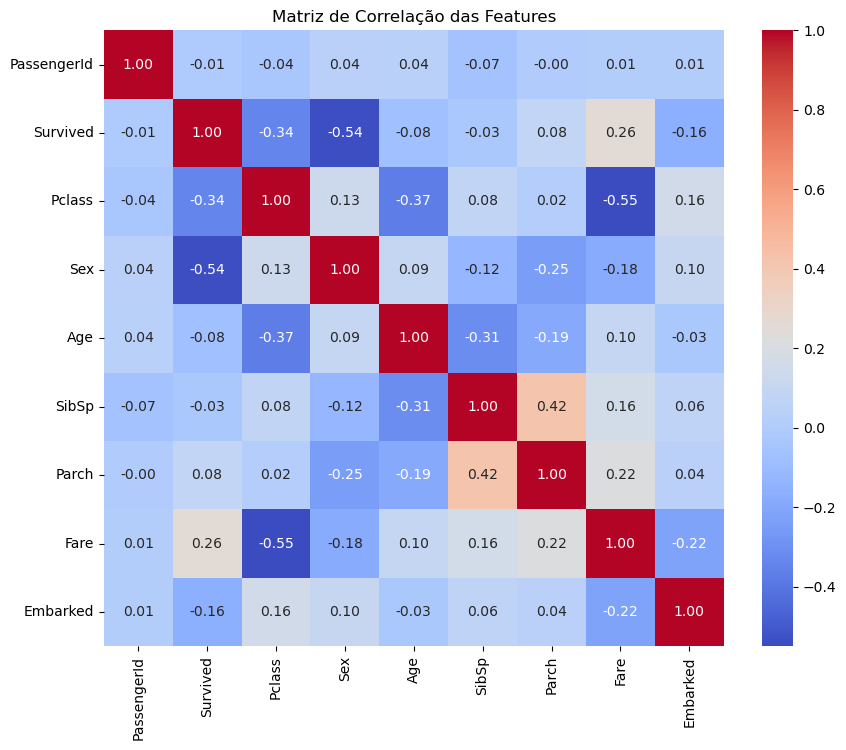

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_norm.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Features')
plt.show()

In [49]:
cor_target = abs(correlation_matrix["Survived"])
relevant_features = cor_target[cor_target > 0.1]
irrelevant_features = cor_target[cor_target <= 0.1]
print('Features Relevantes:')
print("====================================")
print(relevant_features)
print("====================================")
print('Features Irrelevantes:')
print(irrelevant_features)

Features Relevantes:
Survived    1.000000
Pclass      0.338481
Sex         0.543351
Fare        0.257307
Embarked    0.163517
Name: Survived, dtype: float64
Features Irrelevantes:
PassengerId    0.005007
Age            0.077221
SibSp          0.026385
Parch          0.081629
Name: Survived, dtype: float64


# 6. Separação do Dataset em Conjuntos de Treino, Teste e Validação:
   - Divida o dataset em 75% para treino, 25% para teste e utilize 10% do conjunto de treino para validação.


In [59]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(columns=['Survived', 'PassengerId', 'Age', 'SibSp', 'Parch'])
y = df_norm['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 7. Avaliação de Diferentes Valores de k:
   - Execute o classificador para 30 valores diferentes de k, variando de 4 em 4, e registre as acurácias utilizando o dataset de validação. Apresente os resultados em um gráfico para identificar o melhor valor de k.


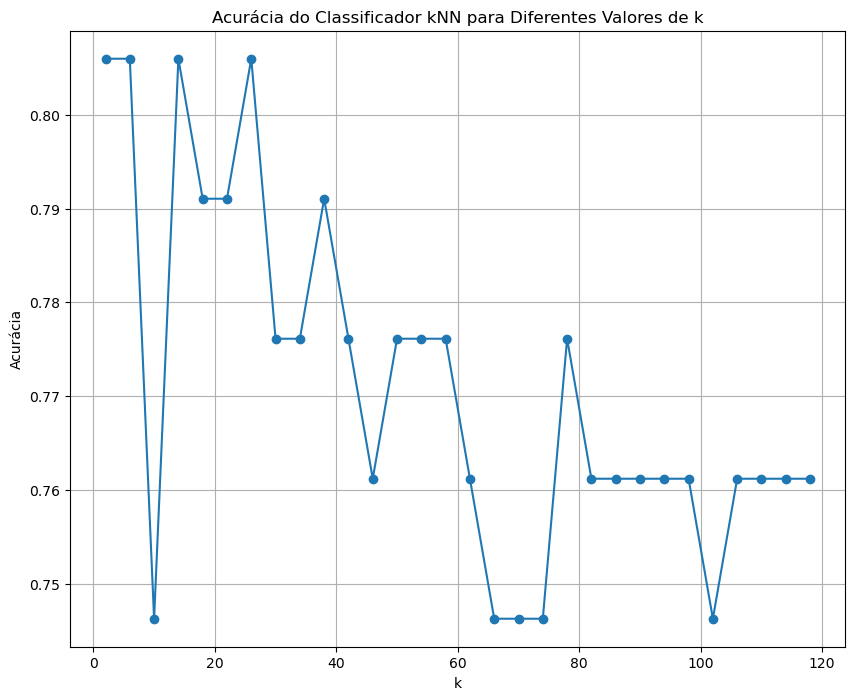

In [60]:
from sklearn.metrics import accuracy_score

k = [i for i in range(2, 122, 4)]
accuracies = []

for i in k:
    y_pred = np.array([
      classify_knn(
        sample, 
        X_train_val.to_numpy(), 
        y_train_val.to_numpy(), 
        i
      ) 
      for sample in X_val.to_numpy()
    ])
    accuracies.append(accuracy_score(y_val, y_pred))
  
plt.figure(figsize=(10, 8))
plt.plot(k, accuracies, marker='o')
plt.title('Acurácia do Classificador kNN para Diferentes Valores de k')
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.grid()
plt.show()
    


# 8. Avaliação do Melhor Modelo:
   - Após identificar o melhor k, execute o classificador utilizando o dataset de teste e apresente um relatório da precisão do modelo, incluindo gráficos com os resultados.

In [61]:
best_k = k[np.argmax(accuracies)]
print(f'Melhor valor de k: {best_k}')

Melhor valor de k: 2


In [62]:
k = 2

y_pred = np.array([
  classify_knn(
    sample, 
    X_train.to_numpy(), 
    y_train.to_numpy(), 
    i
  ) 
  for sample in X_test.to_numpy()
])
accuracies = (accuracy_score(y_test, y_pred))

print(f'Acurácia do modelo: {accuracies}')


Acurácia do modelo: 0.7354260089686099


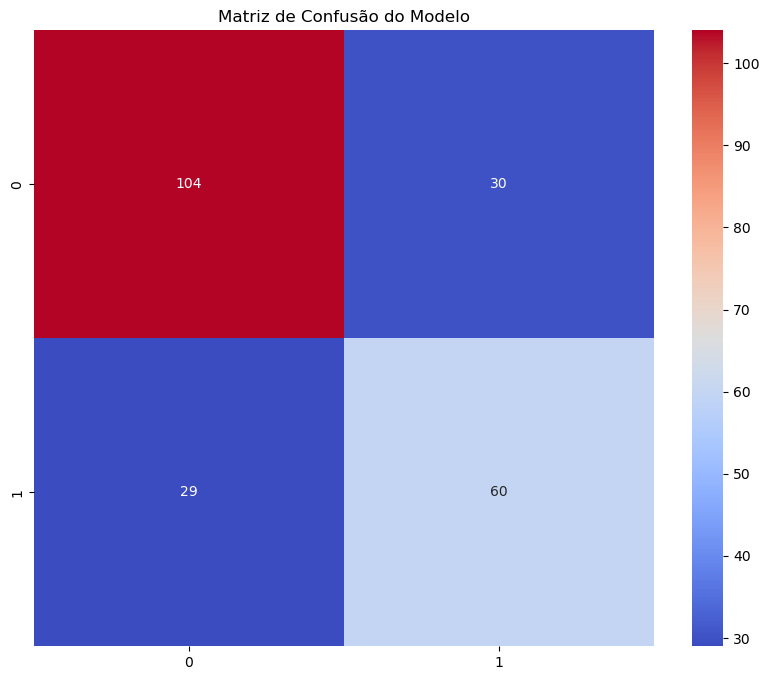

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Matriz de Confusão do Modelo')
plt.show()


O modelo apresentou uma acurácia de aproximadamente 73%, o que indica que o modelo é capaz de prever corretamente a sobrevivência de 73% dos passageiros. 

A matriz de confusão mostra que o modelo acertou 104 passageiros que não sobreviveram e 60 que sobreviveram, mas errou 30 passageiros que não sobreviveram e 29 que sobreviveram.